In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings as w
w.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file


Saving Global_EV_Data_2024.csv to Global_EV_Data_2024.csv


In [ ]:
import pandas as pd
dataset = pd.read_csv('Global_EV_Data_2024.csv')


In [ ]:
dataset = pd.read_csv('Global_EV_Data_2024.csv')
df = dataset.copy()
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,12654,54,World,1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,12654,3,Historical,9174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,12654,8,EV stock,3470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,12654,5,Cars,4706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,12654,6,EV,4894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,12654.0,NaN,NaN,NaN,2019.822112,5.476494,2010.0,2016.0,2020.0,2022.0,2035.0
unit,12654,6,Vehicles,6842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,12654.0,NaN,NaN,NaN,427374.173498,6860498.318587,0.000001,2.0,130.0,5500.0,440000000.0


In [ ]:
df.isnull().sum()

,0
region,0
category,0
parameter,0
mode,0
powertrain,0
year,0
unit,0
value,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
def colm(df):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['category','object','bool']]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ['int','float']]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 15 and str(df[col].dtypes) in ['category','object']]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in df.columns if df[col].dtypes in ['int','float']]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f'Kategorik : {cat_cols} \n Nümerik : {num_cols} \n Kardinal : {cat_but_car}')
    return cat_cols,num_cols,cat_but_car

In [ ]:
catC,numC,catdC = colm(df)

Kategorik : ['category', 'parameter', 'mode', 'powertrain', 'unit'] 
 Nümerik : ['year', 'value'] 
 Kardinal : ['region']


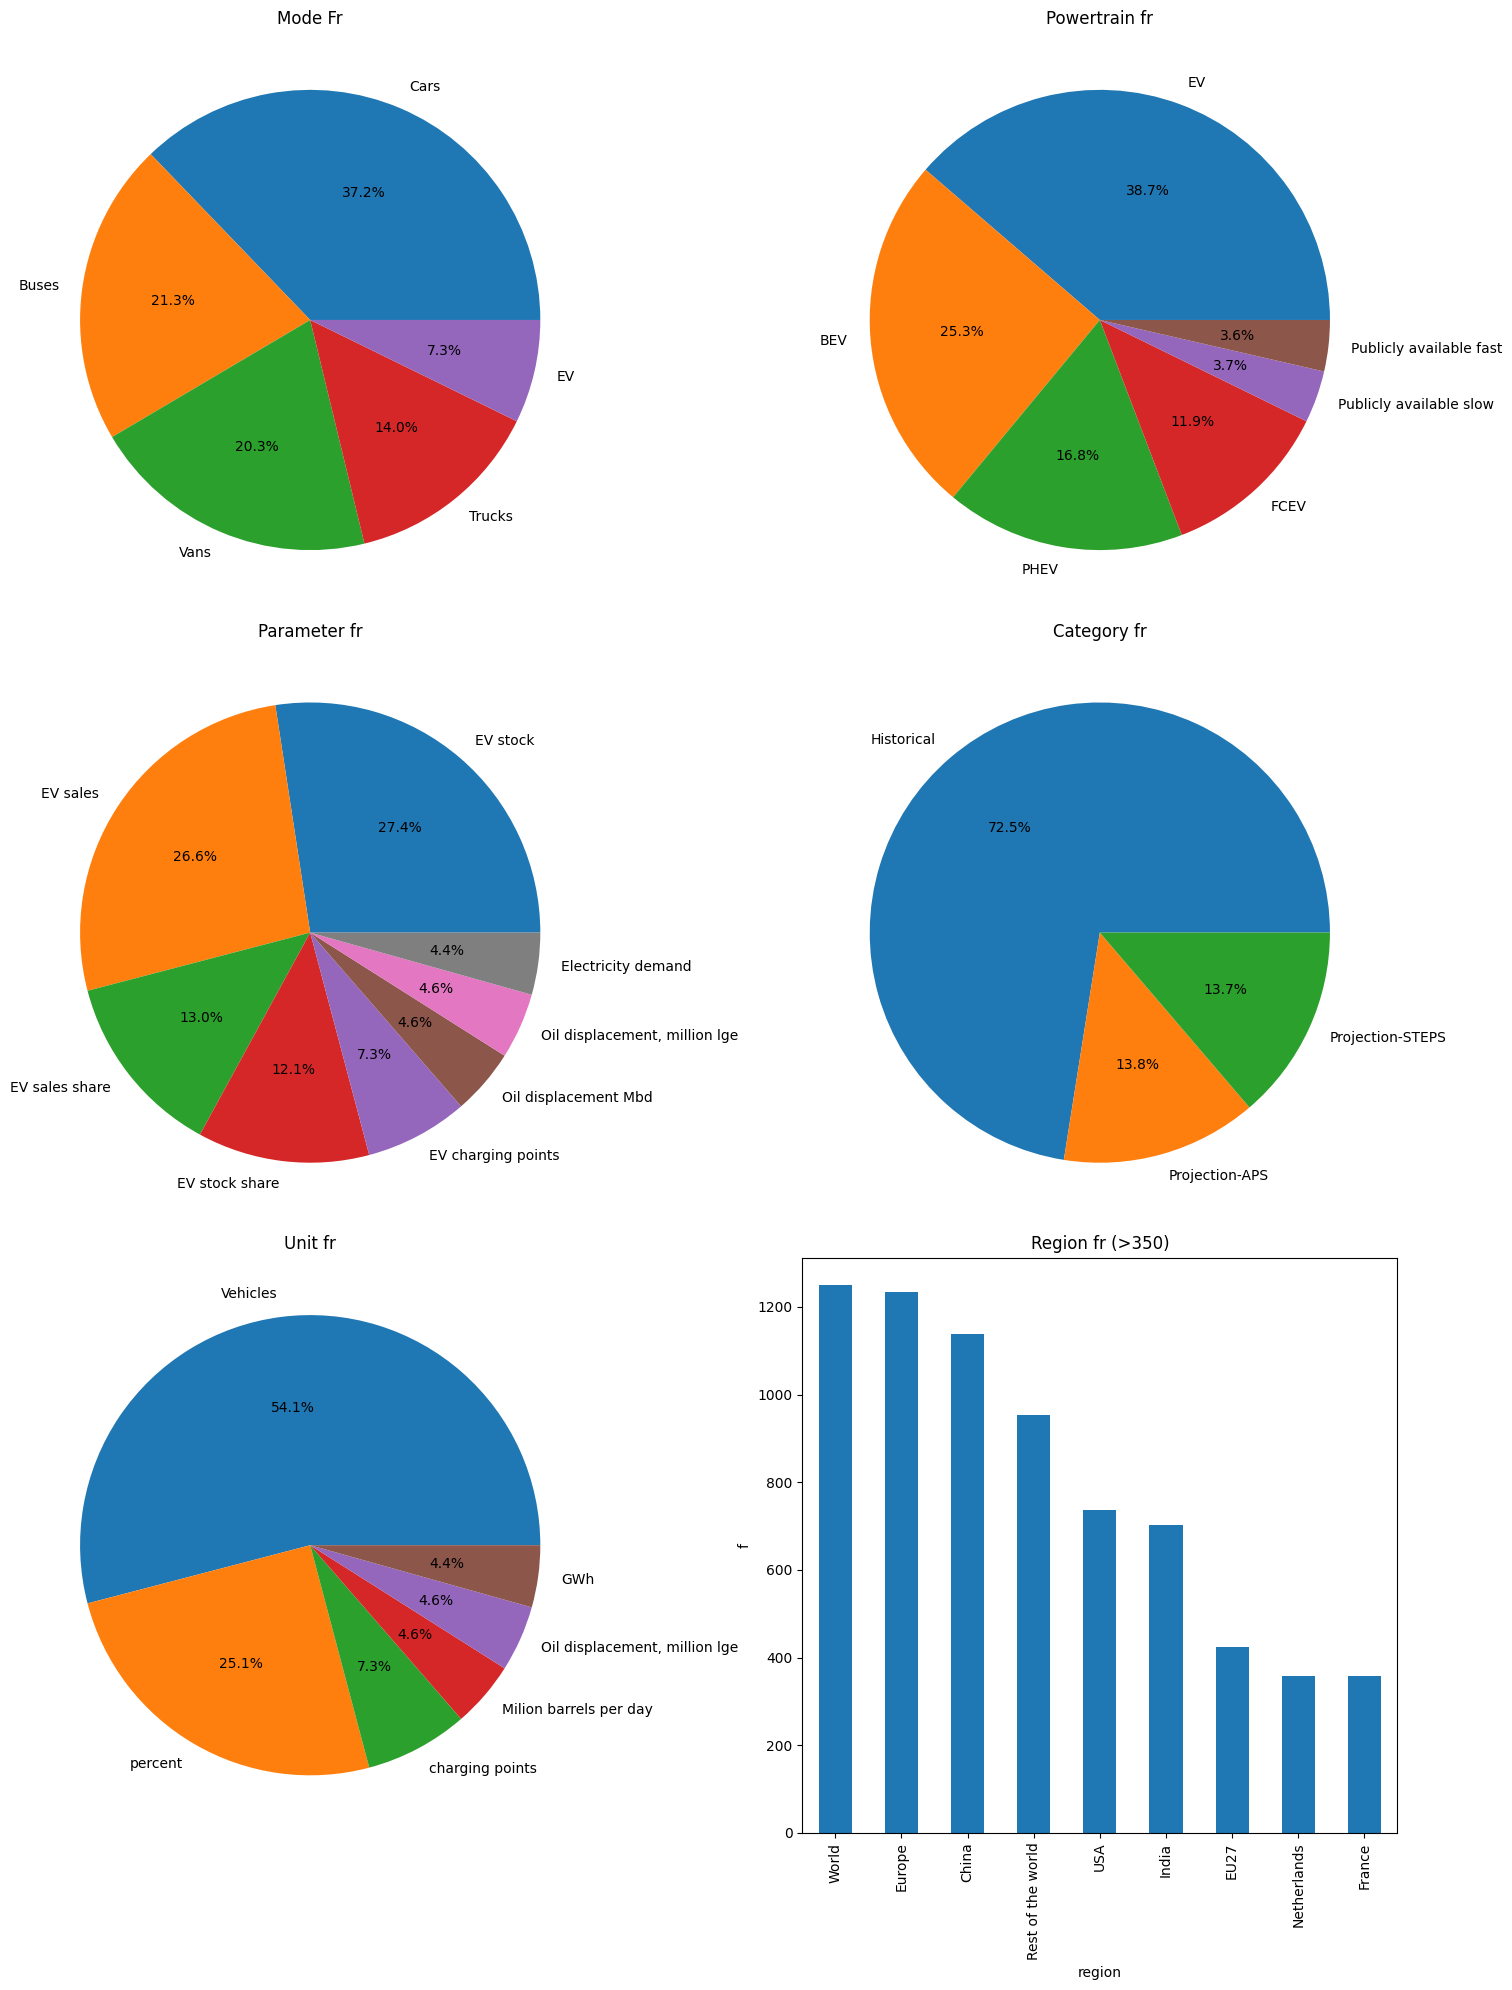

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 20))

df['mode'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Mode Fr')
ax1.set_ylabel('')

df['powertrain'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Powertrain fr')
ax2.set_ylabel('')

df['parameter'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Parameter fr')
ax3.set_ylabel('')

df['category'].value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%')
ax4.set_title('Category fr')
ax4.set_ylabel('')

df['unit'].value_counts().plot(kind='pie', ax=ax5, autopct='%1.1f%%')
ax5.set_title('Unit fr')
ax5.set_ylabel('')


rc = df['region'].value_counts()
rcf = rc[rc > 350]
rcf.plot(kind='bar', ax=ax6)
ax6.set_title('Region fr (>350)')
ax6.set_ylabel('f')

plt.tight_layout()
plt.show()


In [ ]:
value_gb = df.groupby('year')['value'].mean()
px.line(value_gb,title='Yillara gore deger')


In [ ]:
value_gb_pt = df.groupby('parameter')['value'].mean().sort_values(ascending=False)
px.bar(value_gb_pt,title='Parametre bazında ortalama değer')

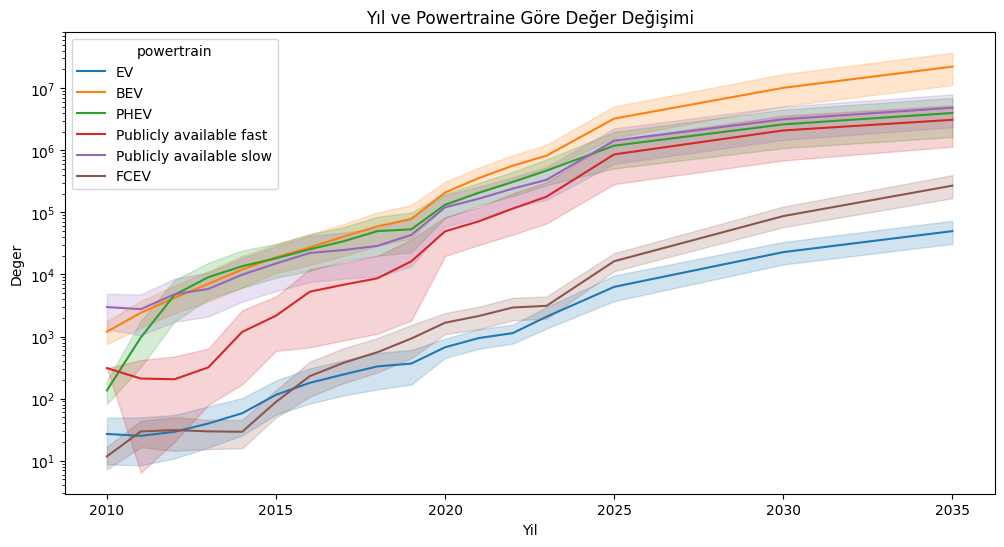

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='value', hue='powertrain')
plt.title('Yıl ve Powertraine Göre Değer Değişimi')
plt.xlabel('Yil')
plt.ylabel('Deger')
plt.yscale('log')
plt.show()

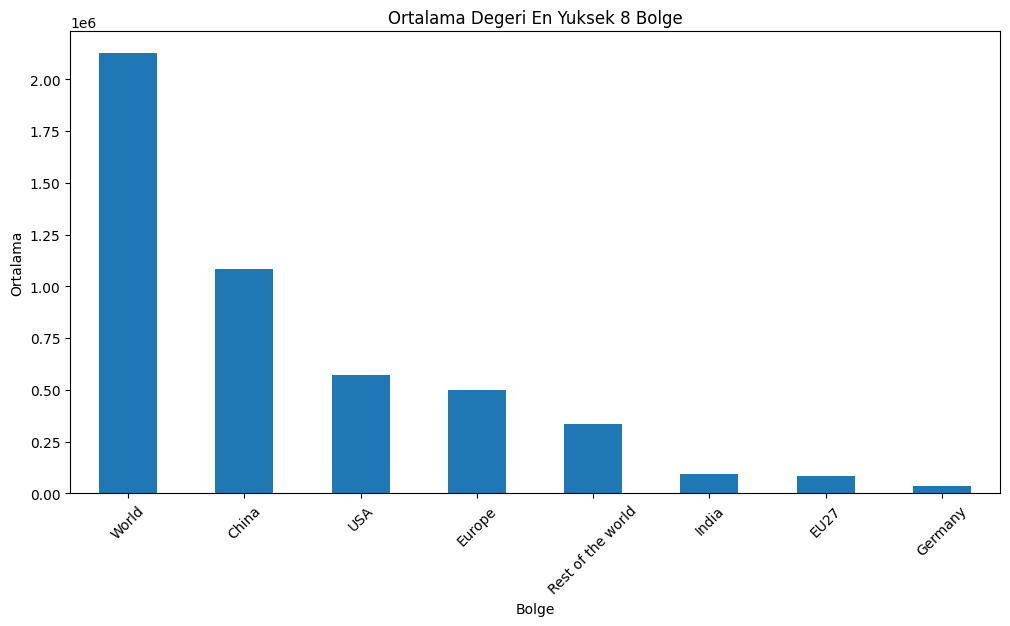

In [ ]:
plt.figure(figsize=(12, 6))
top_10_regions = df.groupby('region')['value'].mean().sort_values(ascending=False).head(8)
top_10_regions.plot(kind='bar')
plt.title('Ortalama Degeri En Yuksek 8 Bolge')
plt.xlabel('Bolge')
plt.ylabel('Ortalama')
plt.xticks(rotation=45)
plt.show()